In [65]:
from fuzzingbook import Fuzzer
from fuzzingbook.bookutils import unicode_escape, terminal_escape, setup

In [66]:
def test_me(x, y):
    if x == 2 * (y + 1):
        return True
    else:
        return False

In [67]:
MAX = 1000
MIN = -MAX


def neighbors(x, y):
    return [
        (x + dx, y + dy)
        for dx in [-1, 0, 1]
        for dy in [-1, 0, 1]
        if (dx != 0 or dy != 0) and ((MIN <= x + dx <= MAX) and (MIN <= y + dy <= MAX))
    ]

In [68]:
print(neighbors(10, 10))

[(9, 9), (9, 10), (9, 11), (10, 9), (10, 11), (11, 9), (11, 10), (11, 11)]


In [69]:
def calculate_distance(x, y):
    return abs(x - 2 * (y + 1))

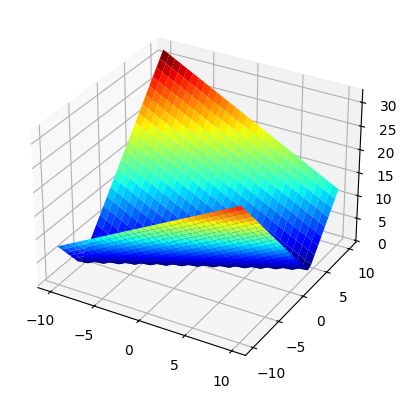

In [70]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
xx = np.outer(np.linspace(-10,10,30),np.ones(30))
yy = xx.copy().T
zz = calculate_distance(xx,yy)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(xx,yy,zz,cmap=plt.cm.jet,rstride=1,cstride=1,linewidth=0)


In [71]:
def test_me_instrumented(x, y):
    print(
        "Instrumentation: Input = (%d, %d), distance = %d"
        % (x, y, calculate_distance(x, y))
    )
    if x == 2 * (y + 1):
        return True
    else:
        return False

In [72]:
def test_me_instrumented(x, y):
    global distance
    distance = calculate_distance(x, y)

    if x == 2 * (y + 1):
        return True
    else:
        return False


def get_fitness(x, y):
    global distance
    test_me_instrumented(x, y)
    fitness = distance
    return fitness

In [73]:
x, y = 274, 153
print("Origin %d, %d has fitness %d" % (x, y, get_fitness(x, y)))
for nx, ny in neighbors(x, y):
    print("neighbor %d, %d has fitness %d" % (nx, ny, get_fitness(nx, ny)))

Origin 274, 153 has fitness 34
neighbor 273, 152 has fitness 33
neighbor 273, 153 has fitness 35
neighbor 273, 154 has fitness 37
neighbor 274, 152 has fitness 32
neighbor 274, 154 has fitness 36
neighbor 275, 152 has fitness 31
neighbor 275, 153 has fitness 33
neighbor 275, 154 has fitness 35


In [74]:
import random

LOG_VALUES = 20


def hillclimber():
    x, y = random.randint(MIN, MAX), random.randint(MIN, MAX)
    fitness = get_fitness(x, y)
    print("Initial value: %d, %d at fitness %.4f" % (x, y, fitness))
    iterations = 0
    logs = 0

    while fitness > 0:
        iterations += 1
        for nextx, nexty in neighbors(x, y):
            new_fitness = get_fitness(nextx, nexty)
            if new_fitness < fitness:
                x, y = nextx, nexty
                fitness = new_fitness
                if logs < LOG_VALUES:
                    print("New value: %d, %d at fitness %.4f" % (x, y, fitness))
                elif logs == LOG_VALUES:
                    print("...")
                logs += 1
                break
        print("Found optimum after %d iterations at %d, %d" % (iterations, x, y))

In [75]:
hillclimber()

Initial value: 974, 222 at fitness 528.0000
New value: 973, 222 at fitness 527.0000
Found optimum after 1 iterations at 973, 222
New value: 972, 222 at fitness 526.0000
Found optimum after 2 iterations at 972, 222
New value: 971, 222 at fitness 525.0000
Found optimum after 3 iterations at 971, 222
New value: 970, 222 at fitness 524.0000
Found optimum after 4 iterations at 970, 222
New value: 969, 222 at fitness 523.0000
Found optimum after 5 iterations at 969, 222
New value: 968, 222 at fitness 522.0000
Found optimum after 6 iterations at 968, 222
New value: 967, 222 at fitness 521.0000
Found optimum after 7 iterations at 967, 222
New value: 966, 222 at fitness 520.0000
Found optimum after 8 iterations at 966, 222
New value: 965, 222 at fitness 519.0000
Found optimum after 9 iterations at 965, 222
New value: 964, 222 at fitness 518.0000
Found optimum after 10 iterations at 964, 222
New value: 963, 222 at fitness 517.0000
Found optimum after 11 iterations at 963, 222
New value: 962, 222

In [76]:
def steepest_ascent_hillclimber():
    x, y = random.randint(MIN, MAX), random.randint(MIN, MAX)
    fitness = get_fitness(x, y)
    print("Initial value: %d, %d at fitness %.4f" % (x, y, fitness))
    iterations = 0
    logs = 0

    while fitness > 0:
        iterations += 1
        for nextx, nexty in neighbors(x, y):
            new_fitness = get_fitness(nextx, nexty)
            if new_fitness < fitness:
                x, y = nextx, nexty
                fitness = new_fitness
                if logs < LOG_VALUES:
                    print("New value: %d, %d at fitness %.4f" % (x, y, fitness))
                elif logs == LOG_VALUES:
                    print("...")
                logs += 1

    print("Found optimum after %d iterations at %d, %d" % (iterations, x, y))

In [77]:
steepest_ascent_hillclimber()

Initial value: -158, 417 at fitness 994.0000
New value: -159, 416 at fitness 993.0000
New value: -158, 416 at fitness 992.0000
New value: -157, 416 at fitness 991.0000
New value: -158, 415 at fitness 990.0000
New value: -157, 415 at fitness 989.0000
New value: -156, 415 at fitness 988.0000
New value: -157, 414 at fitness 987.0000
New value: -156, 414 at fitness 986.0000
New value: -155, 414 at fitness 985.0000
New value: -156, 413 at fitness 984.0000
New value: -155, 413 at fitness 983.0000
New value: -154, 413 at fitness 982.0000
New value: -155, 412 at fitness 981.0000
New value: -154, 412 at fitness 980.0000
New value: -153, 412 at fitness 979.0000
New value: -154, 411 at fitness 978.0000
New value: -153, 411 at fitness 977.0000
New value: -152, 411 at fitness 976.0000
New value: -153, 410 at fitness 975.0000
New value: -152, 410 at fitness 974.0000
...
Found optimum after 332 iterations at 172, 85


In [78]:
def plotting_hillclimber(fitness_function):
    data = []
    x, y = random.randint(MIN, MAX), random.randint(MIN, MAX)
    fitness = fitness_function(x, y)
    data += [fitness]
    iterations = 0

    while fitness > 0:
        iterations += 1
        for nextx, nexty in neighbors(x, y):
            new_fitness = fitness_function(nextx, nexty)
            if new_fitness < fitness:
                x, y = nextx, nexty
                fitness = new_fitness
                data += [fitness]
                break
    print("Found optimum after %d iterations at %d, %d" % (iterations, x, y))
    return data

In [79]:
data = plotting_hillclimber(get_fitness)

Found optimum after 541 iterations at -1000, -501


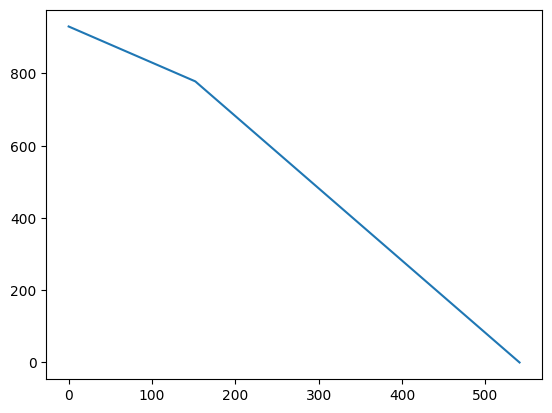

In [80]:
fig = plt.figure()
ax = plt.axes()

xs = range(len(data))
ax.plot(xs, data)

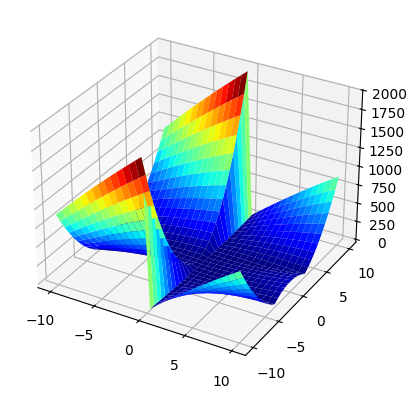

In [81]:
def test_me2(x, y):
    if x * x == y * y * (x % 20):
        return True
    else:
        return False


def test_me2_instrumented(x, y):
    global distance
    distance = abs(x * x - y * y * (x % 20))
    if x * x == y * y * (x % 20):
        return True
    else:
        return False


def bad_fitness(x, y):
    global distance
    test_me2_instrumented(x, y)
    fitness = distance
    return fitness


xx = np.outer(np.linspace(-10, 10, 30), np.ones(30))
yy = xx.copy().T
zz = abs(xx * xx - yy * yy * (xx % 20))

fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_surface(xx, yy, zz, cmap=plt.cm.jet, rstride=1, cstride=1, linewidth=0)

In [82]:
def restarting_hillclimber(fitness_function):
    data = []

    x, y = random.randint(MIN, MAX), random.randint(MIN, MAX)
    fitness = fitness_function(x, y)
    data += [fitness]
    print(f"Initial Value: {x} {y} at fitness {fitness:.4f}")
    iterations = 0
    while fitness > 0:
        changed = False
        iterations += 1

        for nextx, nexty in neighbors(x, y):
            new_fitness = fitness_function(nextx, nexty)
            if new_fitness < fitness:
                x, y = nextx, nexty
                fitness = new_fitness
                data += [fitness]
                changed = True
                break
        if not changed:
            x, y = random.randint(MIN, MAX), random.randint(MIN, MAX)
            fitness = fitness_function(x, y)
            data += [fitness]

    print(f"Found optimum after {iterations} iterations at {x},{y}")
    return data

In [83]:
data = restarting_hillclimber(bad_fitness)

Initial Value: -936 -724 at fitness 1220608.0000
Found optimum after 229 iterations at 661,661


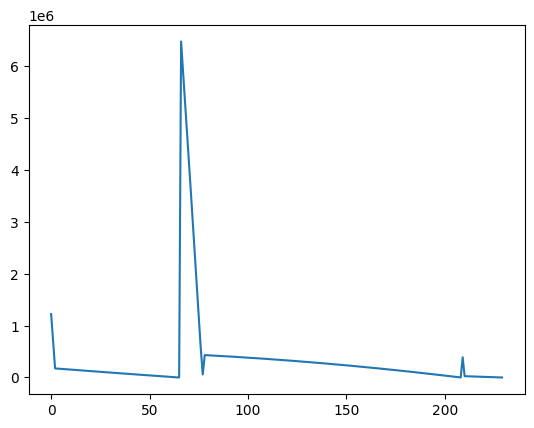

In [84]:
fig = plt.figure()
ax = plt.axes()

xs = range(len(data))
ax.plot(xs, data)

In [85]:
MAX = 100000
MIN = -MAX

from fuzzingbook.Timer import Timer

with Timer() as t:
    restarting_hillclimber(get_fitness)
    print(f"Search time: {t.elapsed_time():.2f}")

Initial Value: 3272 -96202 at fitness 195674.0000
Found optimum after 149473 iterations at -100000,-50001
Search time: 0.41


In [86]:
def cgi_decode(s):
    """Decode the CGI-encoded string `s`:
    * replace "+" by " "
    * replace "%xx" by the character with hex number xx.
    Return the decoded string.  Raise `ValueError` for invalid inputs."""

    # Mapping of hex digits to their integer values
    hex_values = {
        "0": 0,
        "1": 1,
        "2": 2,
        "3": 3,
        "4": 4,
        "5": 5,
        "6": 6,
        "7": 7,
        "8": 8,
        "9": 9,
        "a": 10,
        "b": 11,
        "c": 12,
        "d": 13,
        "e": 14,
        "f": 15,
        "A": 10,
        "B": 11,
        "C": 12,
        "D": 13,
        "E": 14,
        "F": 15,
    }

    t = ""
    i = 0
    while i < len(s):
        c = s[i]
        if c == "+":
            t += " "
        elif c == "%":
            digit_high, digit_low = s[i + 1], s[i + 2]
            i += 2
            if digit_high in hex_values and digit_low in hex_values:
                v = hex_values[digit_high] * 16 + hex_values[digit_low]
                t += chr(v)
            else:
                raise ValueError("Invalid encoding")
        else:
            t += c
        i += 1
    return t

In [87]:
def neighbor_strings(x):
    n = []
    for pos in range(len(x)):
        c = ord(x[pos])
        if c < 126:
            n += [x[:pos] + chr(c + 1) + x[pos + 1 :]]
        if c > 32:
            n += [x[:pos] + chr(c - 1) + x[pos + 1 :]]
    return n

In [88]:
print(neighbor_strings("Hello"))

['Iello', 'Gello', 'Hfllo', 'Hdllo', 'Hemlo', 'Heklo', 'Helmo', 'Helko', 'Hellp', 'Helln']


In [89]:
import sys


def distance_character(target, values):
    minimum = sys.maxsize

    for ele in values:
        distance = abs(target - ele)
        if distance < minimum:
            minimum = distance
    return minimum


def update_maps(condition_num, d_true, d_false):
    global distances_true, distances_false

    if condition_num in distances_true.keys():
        distances_true[condition_num] = min(distances_true[condition_num], d_true)
    else:
        distances_true[condition_num] = d_true

    if condition_num in distances_false.keys():
        distances_false[condition_num] = min(distances_false[condition_num], d_false)
    else:
        distances_false[condition_num] = d_false

In [90]:
def evaluate_condition(num, op, lhs, rhs):
    distance_true = 0
    distance_false = 0

    if isinstance(lhs, str):
        lhs = ord(lhs)
    if isinstance(rhs, str):
        rhs = ord(rhs)

    if op == "Eq":
        if lhs == rhs:
            distance_false = 1
        else:
            distance_true = abs(lhs - rhs)

    elif op == "Lt":
        if lhs < rhs:
            distance_false = rhs - lhs
        else:
            distance_true = lhs - rhs + 1
    elif op == "Gt":
        if lhs > rhs:
            distance_false = lhs - rhs
        else:
            distance_true = rhs - lhs

    elif op == "In":
        minimum = sys.maxsize
        for elem in rhs.keys():
            distance = abs(lhs - ord(elem))
            if distance < minimum:
                minimum = distance

        distance_true = minimum
        if distance_true == 0:
            distance_false = 1

    update_maps(num, distance_true, distance_false)

    if distance_true == 0:
        return True
    else:
        return False

In [91]:
import ast


class BranchTransformer(ast.NodeTransformer):
    branch_num = 0

    def visit_FunctionDef(self, node):
        node.name = node.name + "_instrumented"
        return self.generic_visit(node)

    def visit_Compare(self, node):
        if node.ops[0] in [ast.Is, ast.IsNot, ast.In, ast.NotIn]:
            return node
        self.branch_num += 1
        return ast.Call(
            func=ast.Name("evaluate_condition", ast.Load()),
            args=[
                ast.Constant(self.branch_num),
                ast.Constant(node.ops[0].__class__.__name__),
                node.left,
                node.comparators[0],
            ],
            keywords=[],
            starargs=None,
            kwargs=None,
        )

In [92]:
import inspect
from fuzzingbook.bookutils import print_content

source = inspect.getsource(cgi_decode)
node = ast.parse(source)
BranchTransformer().visit(node)

node = ast.fix_missing_locations(node)
print_content(ast.unparse(node), ".py")

def cgi_decode_instrumented(s):
    """Decode the CGI-encoded string `s`:
    * replace "+" by " "
    * replace "%xx" by the character with hex number xx.
    Return the decoded string.  Raise `ValueError` for invalid inputs."""
    hex_values = {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'a': 10, 'b': 11, 'c': 12, 'd': 13, 'e': 14, 'f': 15, 'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15}
    t = ''
    i = 0
    while evaluate_condition(1, 'Lt', i, len(s)):
        c = s[i]
        if evaluate_condition(2, 'Eq', c, '+'):
            t += ' '
        elif evaluate_condition(3, 'Eq', c, '%'):
            digit_high, digit_low = (s[i + 1], s[i + 2])
            i += 2
            if evaluate_condition(4, 'In', digit_high, hex_values) and evaluate_condition(5, 'In', digit_low, hex_values):
                v = hex_values[digit_high] * 16 + hex_values[digit_low]
                t += chr(v)
            else:
                raise ValueError('Invali

In [93]:
from typing import Dict, cast


def create_instrumented_function(f):
    source = inspect.getsource(f)
    node = ast.parse(source)
    node = BranchTransformer().visit(node)
    node = ast.fix_missing_locations(node)

    current_module = sys.modules[__name__]
    code = compile(cast(ast.Module, node), filename="<ast>", mode="exec")
    exec(code, current_module.__dict__)


distances_true: Dict[int, int] = {}
distances_false: Dict[int, int] = {}

create_instrumented_function(cgi_decode)

In [94]:
assert cgi_decode("Hello+Reader") == cgi_decode_instrumented("Hello+Reader")

In [95]:
distances_true

{1: 0, 2: 0, 3: 35}

In [96]:
distances_false

{1: 0, 2: 0, 3: 0}

In [97]:
def normalize(x):
    return x / (1.0 + x)

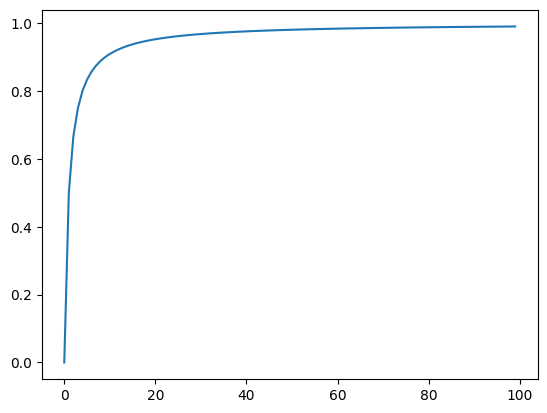

In [98]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes()

xs = range(100)
ys = [value / (value + 1.0) for value in xs]
ax.plot(xs, ys)

In [ ]:
def get_fitness_cgi(x):
    # Reset any distance values from previous executions
    global distances_true, distances_false
    distances_true = {}
    distances_false = {}

    # Run the function under test
    try:
        cgi_decode_instrumented(x)
    except BaseException:
        pass

    # Sum up branch distances
    fitness = 0.0
    for branch in [1, 3, 4, 5]:
        if branch in distances_true:
            fitness += normalize(distances_true[branch])
        else:
            fitness += 1.0

    for branch in [2]:
        if branch in distances_false:
            fitness += normalize(distances_false[branch])
        else:
            fitness += 1.0

    return fitness

In [100]:
def random_string(l):
    s = ""
    for i in range(l):
        random_character = chr(random.randrange(32, 127))
        s = s + random_character
    return s


def hillclimb_cgi():
    x = random_string(10)
    fitness = get_fitness_cgi(x)
    print("Initial input: %s at fitness %.4f" % (x, fitness))

    while fitness > 0:
        changed = False
        for nextx in neighbor_strings(x):
            new_fitness = get_fitness_cgi(nextx)
            if new_fitness < fitness:
                x = nextx
                fitness = new_fitness
                changed = True
                print("New value: %s at fitness %.4f" % (x, fitness))
                break

        if not changed:
            x = random_string(10)
            fitness = get_fitness_cgi(x)

    print("Optimum at %s, fitness %.4f" % (x, fitness))

In [101]:
def random_unicode_string(l):
    s = ""
    for i in range(l):
        random_character = chr(random.randrange(0, 65536))
        s = s + random_character

    return s


def unicode_string_neighbors(x):
    n = []
    for pos in range(len(x)):
        c = ord(x[pos])
        if c < 65536:
            n += [x[:pos] + chr(c + 1) + x[pos + 1 :]]
        if c > 0:
            n += [x[:pos] + chr(c - 1) + x[pos + 1 :]]

    return n

In [102]:
def terminal_repr(s):
    return terminal_escape(repr(s))

In [103]:
def hillclimb_cgi_limited(max_iterations):
    x = random_unicode_string(10)
    fitness = get_fitness_cgi(x)
    print("Initial input: %s at fitness %.4f" % (terminal_repr(x), fitness))

    iteration = 1
    logs = 0
    while fitness > 0 and iteration < max_iterations:
        changed = False
        for nextx in unicode_string_neighbors(x):
            new_fitness = get_fitness_cgi(nextx)
            if new_fitness < fitness:
                x = nextx
                fitness = new_fitness
                changed = True
                if logs < LOG_VALUES:
                    print("New value: %s at fitness %.4f" % (terminal_repr(x), fitness))
                elif logs == LOG_VALUES:
                    print("...")
                logs += 1
                break
        if not changed:
            x = random_string(10)
            fitness = get_fitness_cgi(x)
        iteration += 1
    print("Optimum at %s, fitness %.4f" % (terminal_repr(x), fitness))

In [104]:
hillclimb_cgi_limited(100)

Initial input: '栜腱\ue6f8\ue3c4玪ᔙ㟬\ue6ca廉ᦦ' at fitness 2.9998
New value: '栜腱\ue6f8\ue3c4玪ᔘ㟬\ue6ca廉ᦦ' at fitness 2.9998
New value: '栜腱\ue6f8\ue3c4玪ᔗ㟬\ue6ca廉ᦦ' at fitness 2.9998
New value: '栜腱\ue6f8\ue3c4玪ᔖ㟬\ue6ca廉ᦦ' at fitness 2.9998
New value: '栜腱\ue6f8\ue3c4玪ᔕ㟬\ue6ca廉ᦦ' at fitness 2.9998
New value: '栜腱\ue6f8\ue3c4玪ᔔ㟬\ue6ca廉ᦦ' at fitness 2.9998
New value: '栜腱\ue6f8\ue3c4玪ᔓ㟬\ue6ca廉ᦦ' at fitness 2.9998
New value: '栜腱\ue6f8\ue3c4玪ᔒ㟬\ue6ca廉ᦦ' at fitness 2.9998
New value: '栜腱\ue6f8\ue3c4玪ᔑ㟬\ue6ca廉ᦦ' at fitness 2.9998
New value: '栜腱\ue6f8\ue3c4玪ᔐ㟬\ue6ca廉ᦦ' at fitness 2.9998
New value: '栜腱\ue6f8\ue3c4玪ᔏ㟬\ue6ca廉ᦦ' at fitness 2.9998
New value: '栜腱\ue6f8\ue3c4玪ᔎ㟬\ue6ca廉ᦦ' at fitness 2.9998
New value: '栜腱\ue6f8\ue3c4玪ᔍ㟬\ue6ca廉ᦦ' at fitness 2.9998
New value: '栜腱\ue6f8\ue3c4玪ᔌ㟬\ue6ca廉ᦦ' at fitness 2.9998
New value: '栜腱\ue6f8\ue3c4玪ᔋ㟬\ue6ca廉ᦦ' at fitness 2.9998
New value: '栜腱\ue6f8\ue3c4玪ᔊ㟬\ue6ca廉ᦦ' at fitness 2.9998
New value: '栜腱\ue6f8\ue3c4玪ᔉ㟬\ue6ca廉ᦦ' at fitness 2.9998
New value: '栜腱\ue6f8\ue3c4玪

In [105]:
def flip_random_character(s):
    pos = random.randint(0, len(s) - 1)
    new_c = chr(random.randrange(0, 65536))
    return s[:pos] + new_c + s[pos + 1 :]


def randomized_hill_climb():
    x = random_unicode_string(10)
    fitness = get_fitness_cgi(x)
    print("Initial value: %s at fitness %.4f" % (terminal_repr(x), fitness))

    iterations = 0
    while fitness > 0:
        mutated = flip_random_character(x)
        new_fitness = get_fitness_cgi(mutated)
        if new_fitness <= fitness:
            x = mutated
            fitness = new_fitness
            # print("New value: %s at fitness %.4f" %(terminal_repr(x), fitness))
        iterations += 1

    print("Optimum at %s after %d iterations" % (terminal_repr(x), iterations))

In [106]:
def create_population(size):
    return [random_unicode_string(10) for i in range(size)]

In [107]:
def evaluate_population(population):
    fitness = [get_fitness_cgi(x) for x in population]
    return list(zip(population, fitness))

In [108]:
population = create_population(10)

In [109]:
for individual, fitness in evaluate_population(population):
    print("%s: %.4f" % (terminal_repr(individual), fitness))

'즣农햅⚭쪒耆隓쮔᙮\ueab3': 2.9998
'騉궰䫛↧荅쿶퀼땇㝱\ue0df': 2.9999
'則䢧Ġ\ufafd袭ᰲ죏\uf3e6뵕킉': 2.9960
'\ue7ce컓첵魝蠭⅁둸竜\uec6e辷': 2.9999
'ể㉇陏ᬈ䖞ㅙ鑒㍇\u1ad2蛏': 2.9999
'聭ꆗ썤뫩⾿軗㉦캐汗畷': 2.9999
'侯閅ᴮ\uebaf뙶꿆穴䝟䣱廜': 2.9999
'쁽䏕\ua959ꕇ⧩ⴃᵴᲟ퍂ꜚ': 2.9999
'ꊺ슣皼쭚蠍\uf391Ⴉ騶ࡗ㋦': 2.9995
'覱\ue8b8빠馇⅏庬趴髙怜ᇰ': 2.9998


In [110]:
def selection(evaluated_population, tournament_size):
    competition = random.sample(evaluated_population, tournament_size)
    winner = min(competition, key=lambda individual: individual[1])[0]

    return winner[:]

In [111]:
population = create_population(10)
fitness = evaluate_population(population)
selected = selection(fitness, 10)

In [112]:
for individual, fitness_value in fitness:
    print("%s: %.4f" % (terminal_repr(individual), fitness_value))

'⊑募짺觀ꗺ\uf3aa濨鹴⅐\u0cdb': 2.9997
'ࣈ羊倢纕㹈軚뚕\uefc2腻\ue264': 2.9995
'竼◓檿\ude26▏䦏\uf670쁕溓䤤': 2.9999
'객ፍ\uecc5冶烣^䓂걨⥞\ueb49': 2.9828
'채쮀鱦ꐏ楢償켵\u0b91妧ԧ': 2.9992
'ヺ뮾\ueb22㊜\uec60ᣜ鏎칒믩咊': 2.9998
'로턿ꑻ韝柏새쑷⚴畖\udcc4': 2.9999
'汥ꌎ\uf825\uf5a9\ufafdߕ犓좇퓻絰': 2.9995
'戧걡Გᳳ鉇믦ﰞꅝ\ue671劼': 2.9999
'ࣦ⨹寚愇幚聎챤悓鄠쉐': 2.9996


In [113]:
print("Winner: %s" % terminal_repr(selected))

Winner: '객ፍ\uecc5冶烣^䓂걨⥞\ueb49'


In [114]:
def crossover(parent1, parent2):
    pos = random.randint(1, len(parent1))

    offspring1 = parent1[:pos] + parent2[pos:]
    offspring2 = parent2[:pos] + parent1[pos:]

    return (offspring1, offspring2)


parent1 = "Hello World"
parent2 = "Goodbye Book"

crossover(parent1, parent2)

('Hellbye Book', 'Goodo World')

In [115]:
def mutate(chromosome):
    mutated = chromosome[:]
    P = 1.0 / len(mutated)

    for pos in range(len(mutated)):
        if random.random() < P:
            new_c = chr(int(random.gauss(ord(mutated[pos]), 100) % 65536))
            mutated = mutated[:pos] + new_c + mutated[pos + 1 :]

    return mutated

In [116]:
def genetic_algorithm():
    generation = 0
    population = create_population(100)
    fitness = evaluate_population(population)

    best = min(fitness, key=lambda item: item[1])
    best_individual = best[0]
    best_fitness = best[1]
    print(
        "Best fitness of initial population: %s - %.10f"
        % (terminal_repr(best_individual), best_fitness)
    )
    logs = 0

    while best_fitness > 0 and generation < 1000:
        new_population = []

        while len(new_population) < len(population):
            offspring1 = selection(fitness, 10)
            offspring2 = selection(fitness, 10)

            if random.random() < 0.7:
                (offspring1, offspring2) = crossover(offspring1, offspring2)

            offspring1 = mutate(offspring1)
            offspring2 = mutate(offspring2)

            new_population.append(offspring1)
            new_population.append(offspring2)
        generation += 1
        population = new_population
        fitness = evaluate_population(population)

        best = min(fitness, key=lambda item: item[1])
        best_individual = best[0]
        best_fitness = best[1]

        if logs < LOG_VALUES:
            print(
                "Best fitness at generation %d: %s - %.8f"
                % (generation, terminal_repr(best_individual), best_fitness)
            )
        elif logs == LOG_VALUES:
            print("...")
        logs += 1

    print(
        "Best individual: %s, fitness %.10f"
        % (terminal_repr(best_individual), best_fitness)
    )

In [117]:
genetic_algorithm()

Best fitness of initial population: '䟨ꅠￄn\uf7fa䕑쟖\ue2ac\ue13d瀸' - 2.9864864865
Best fitness at generation 1: '▯硅\uef40蛉\uf0cf麘⌤噶b⥸' - 2.98387097
Best fitness at generation 2: '◦砛\uf02c蛑\uf0cf麘⌤噶,⣢' - 2.87500000
Best fitness at generation 3: '䟨砛\uf02c蛑\uf0cf麑⌤噶,⣢' - 2.87500000
Best fitness at generation 4: '▯硅\uef40蛉\uf0cf麘⌤噶,⣢' - 2.87500000
Best fitness at generation 5: '⼝ꄖￄn\uf0cf麘⌤噶,⣢' - 2.87500000
Best fitness at generation 6: '⺽ꄖￄn\uf088麘⌤噶(⥣' - 2.75000000
Best fitness at generation 7: '⺽ꄖￄn\uf088麘⌤噶(⥣' - 2.75000000
Best fitness at generation 8: '⺽ꆎ%=\uf088麘⌤噶*⥣' - 1.80000000
Best fitness at generation 9: '⺽ꆎ%=\uf0d9麘⌤噶*⥣' - 1.80000000
Best fitness at generation 10: '⺽ꆎ%=\uf0e3鸠⌤噶*⣮' - 1.80000000
Best fitness at generation 11: '⺽ꈉ%4\uf088麘⌤噶*⣮' - 0.99998373
Best fitness at generation 12: '⺽ꈉ%4\uf088麘⎎噶Ć⥣' - 0.99998373
Best fitness at generation 13: '⺽ꅑ%4\uf041麘⊮嗾*⥣' - 0.99998371
Best fitness at generation 14: '⺽ꈉ%4\uf01c麘⌤囘*⣮' - 0.99998370
Best fitness at generation 15: '⺽ꅑ%4\uefc2

Best individual: '\u2ffd鮣%a0ꇸ↼制ֹ➊', fitness 0.0000000000


In [118]:
get_fitness_cgi("%UU")

1.9230769230769231